In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

plt.rcParams["figure.dpi"]=300
plt.rcParams["figure.figsize"]=(10,6)

In [9]:
xx=np.array([0,10])
yy=np.array([0,10])

means=np.array([xx.mean(), yy.mean()])
print(means)

corr=0.8
#vogliamo generare un insieme di punti che siano tra loro correlati
stds=np.array([xx.std(), yy.std()])
print(stds)

covs=[
    [stds[0]**2, stds[0]*stds[1]*corr],
    [stds[0]*stds[1]*corr,stds[1]**2]
]
print(np.array(covs))

[5. 5.]
[5. 5.]
[[25. 20.]
 [20. 25.]]


(100, 2)
[[ 5.19895923  1.91024073]
 [-0.04686597  2.92746082]
 [16.31349907 12.1956459 ]
 [ 4.89362317  3.89357628]
 [ 6.42847577  3.73091401]]


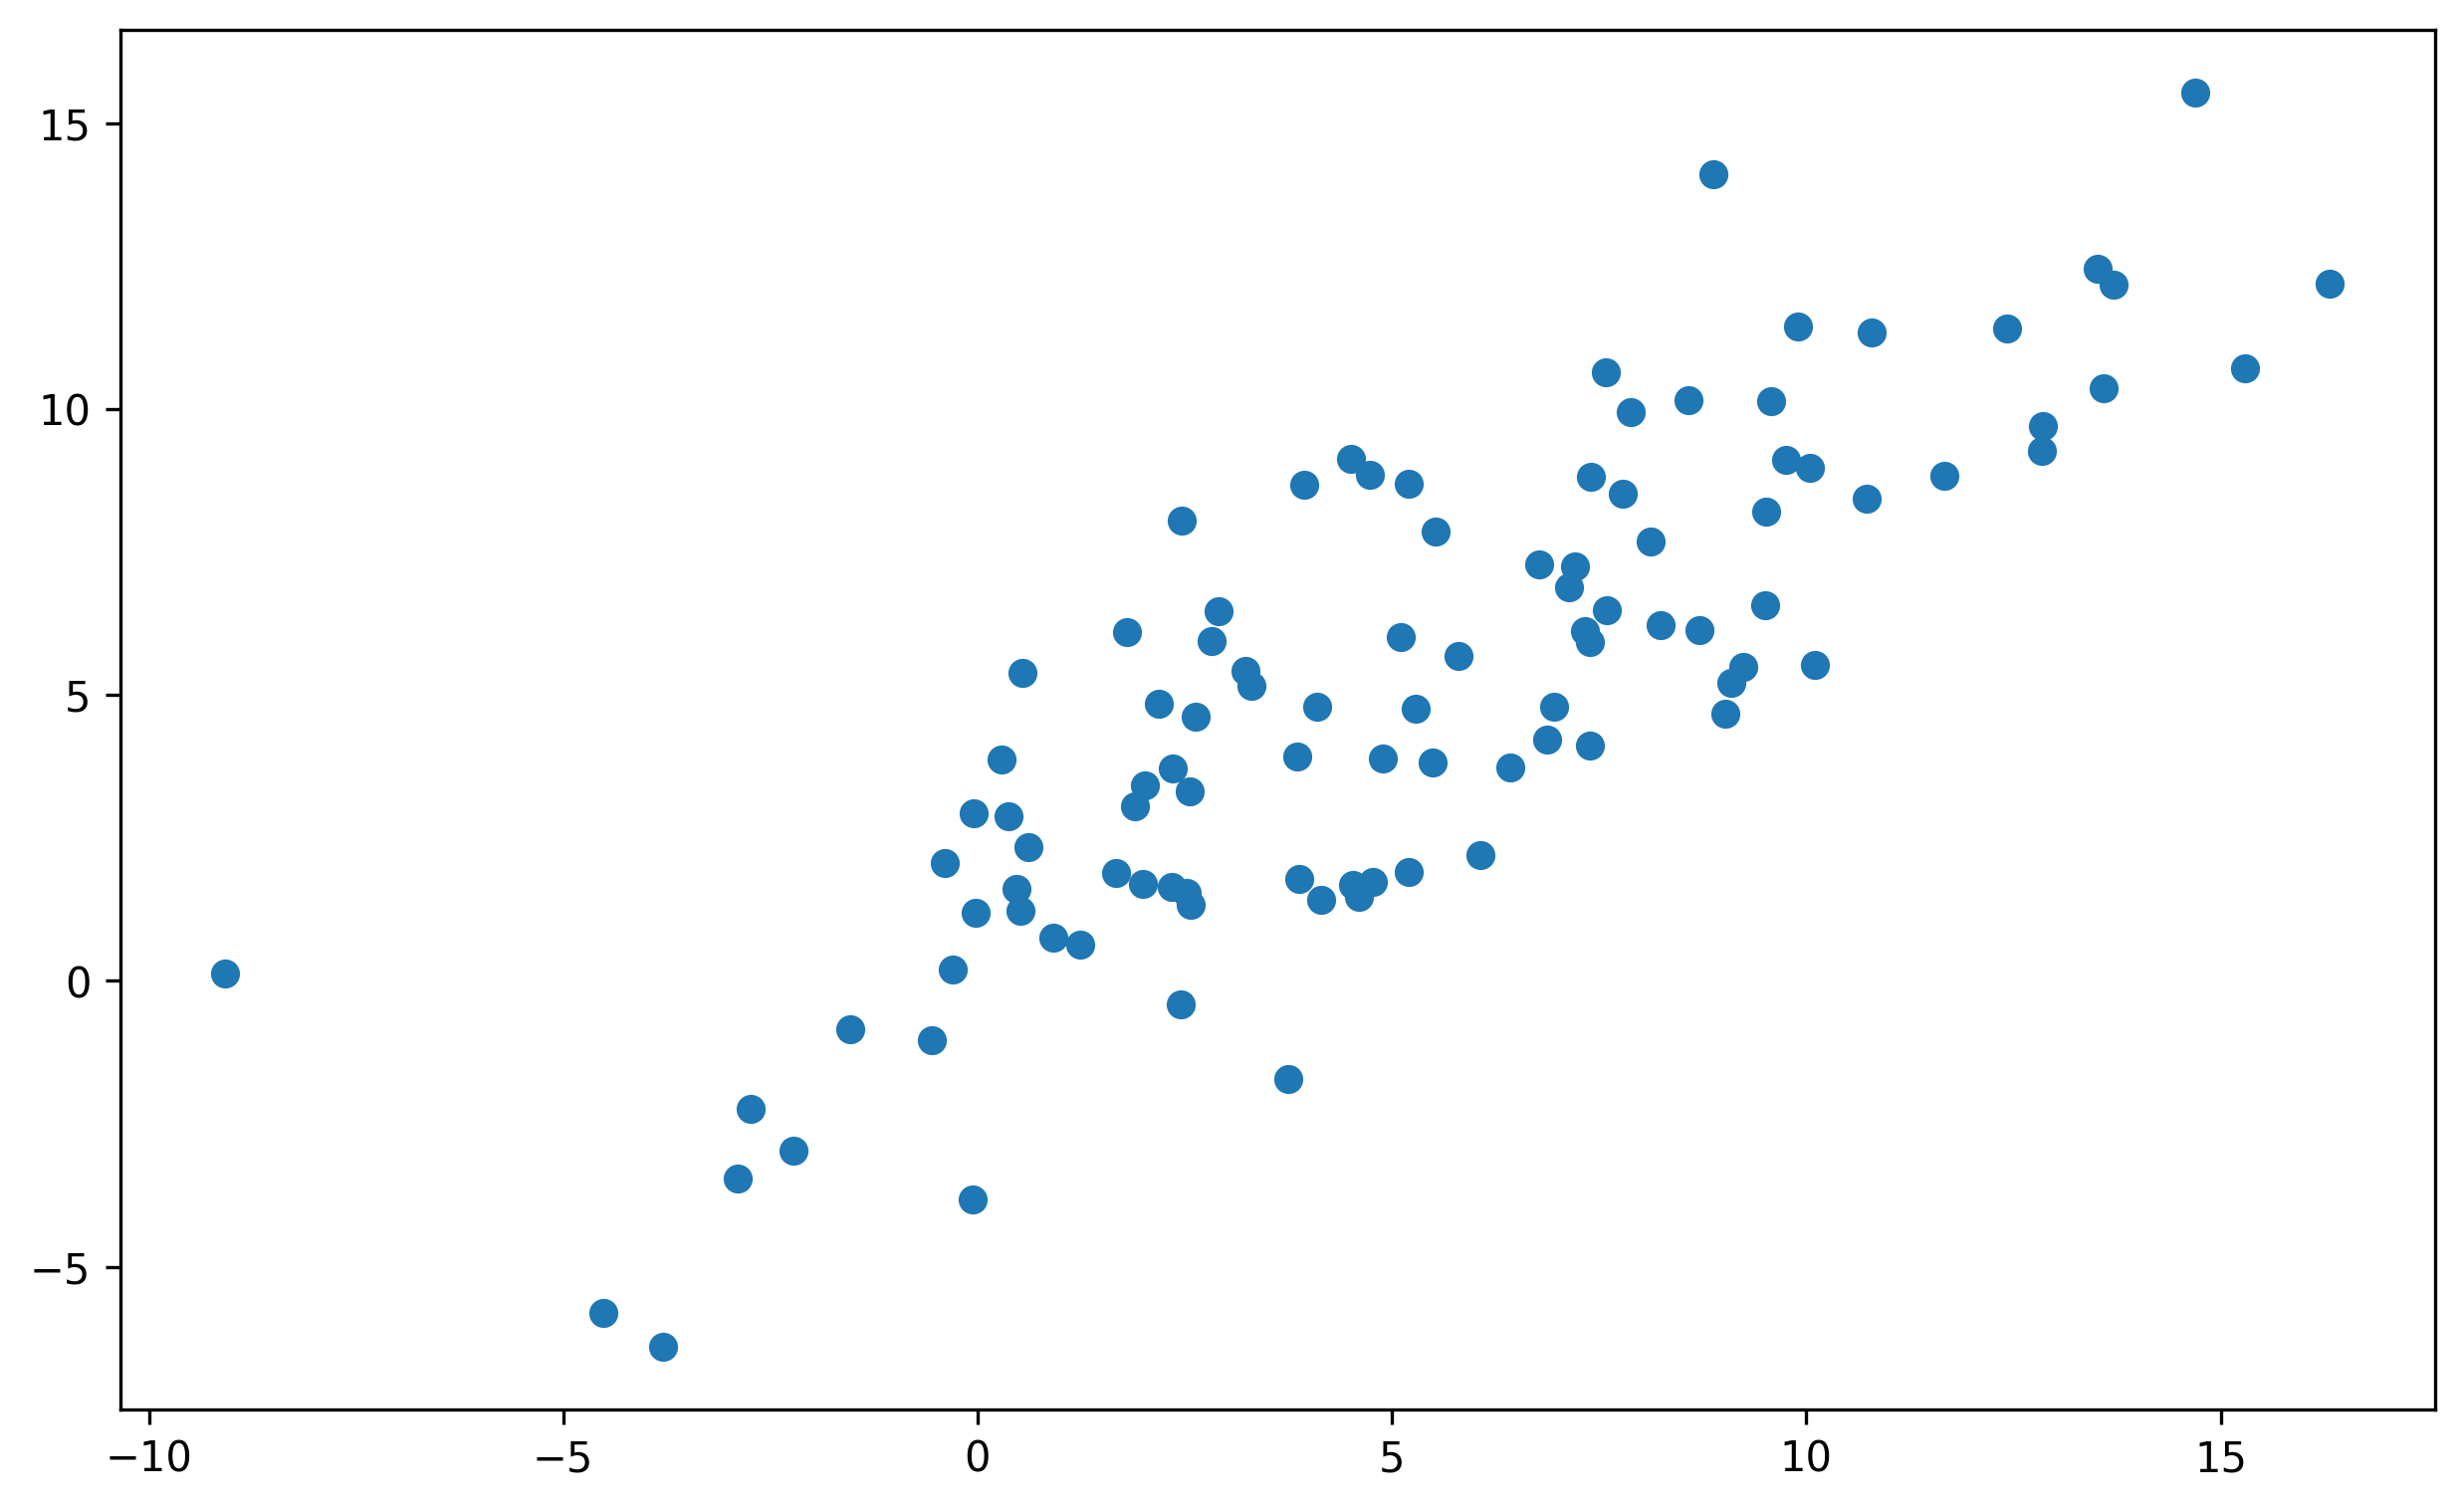

In [12]:
#dataset generato artificialmente
m=np.random.default_rng(seed=42).multivariate_normal(means,covs,100)
#genera 100 campioni casuali da una distriuzione normale multivariata
print(m.shape)

print(m[:5])
plt.scatter(m[:,0],m[:,1])

[5.142925234153316, 4.996969529393959]


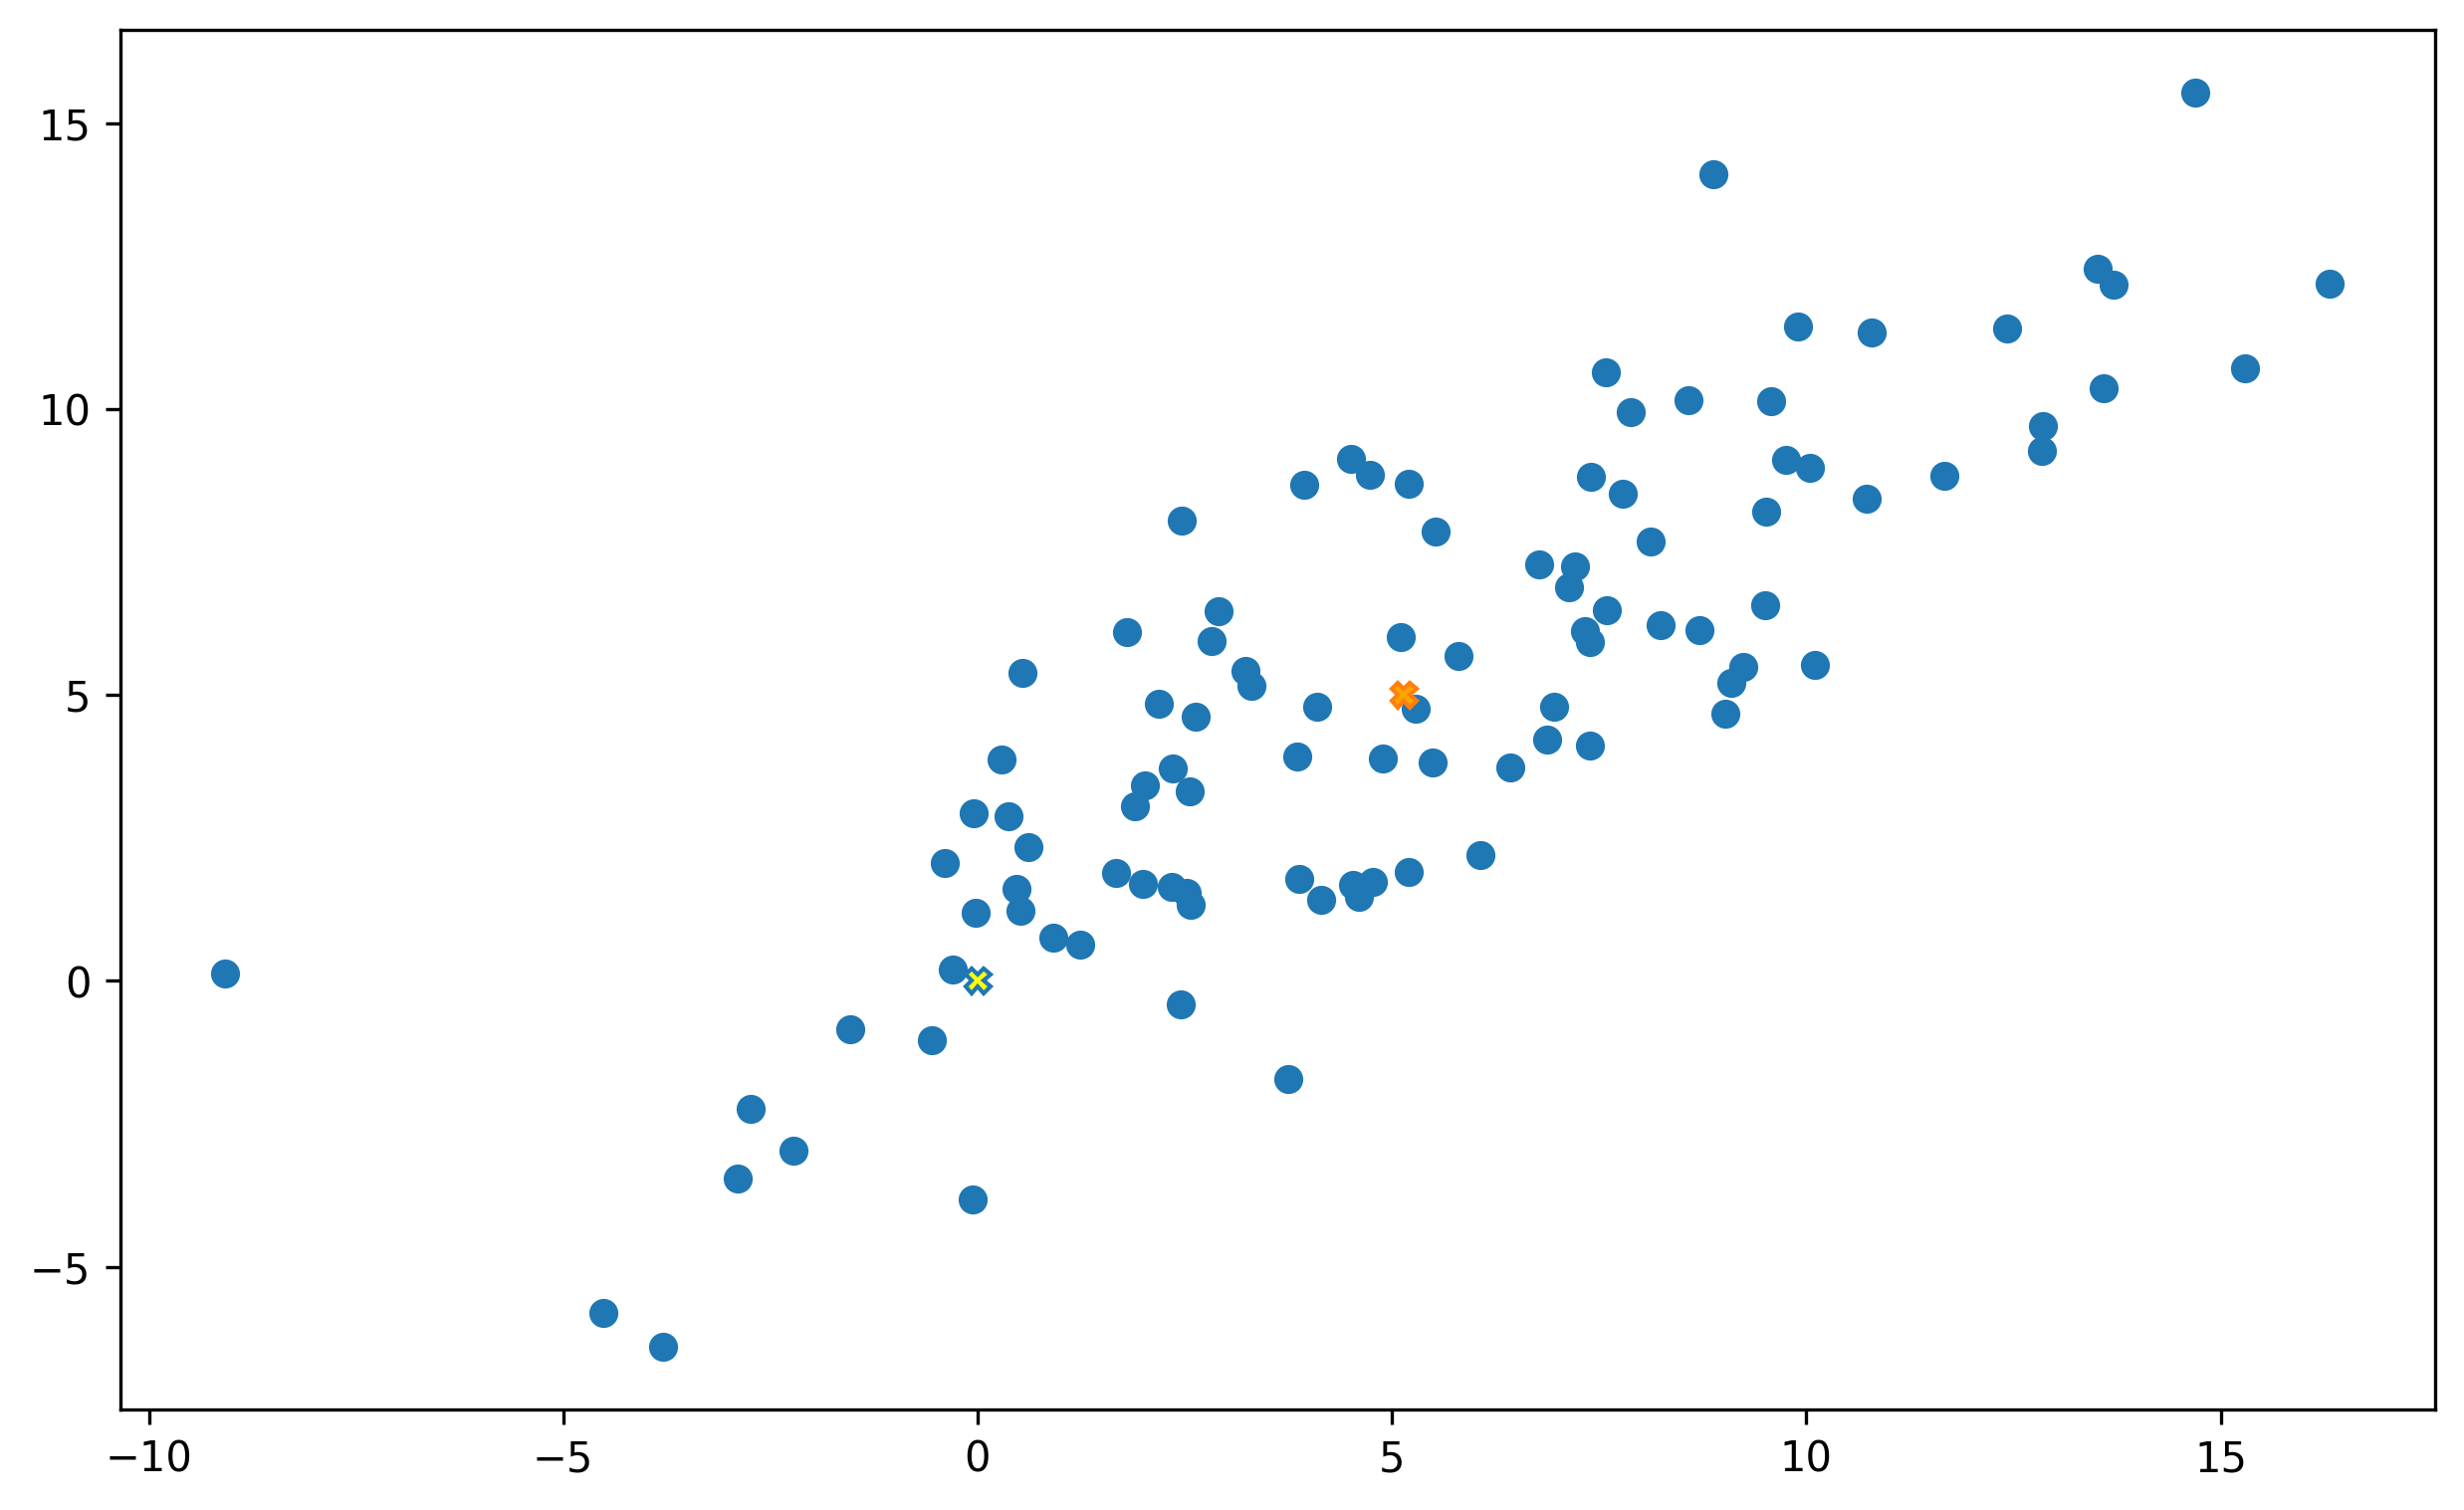

In [14]:
o=[0,0]
mean=[np.mean(m[:,0]),np.mean(m[:,1])]

print(mean)

plt.scatter(m[:,0], m[:,1])
plt.plot(
    o[0], o[1],
    marker="X",
    markerfacecolor="yellow"
)
plt.plot(
    mean[0], mean[1],
    marker="X",
    markerfacecolor="orange"
)

In [15]:
def euclidean(p1,p2):
    dim=len(p1)
    distance=0
    for d in range(0,dim):
        diff= p1[d]-p2[d]
        sq=diff**2
        distance=distance+sq
    return distance**(1/2) #sqrt

def mahalanobis(x, data, cov=None):
    x_mu=x-np.mean(data)
    if cov is None:
        cov=np.cov(data.T) #trasposta
    inv_cov=np.linalg.inv(cov) #algebra lineare . inverso
    left=np.dot(x_mu, inv_cov) #calcolo i termini della distanza
    distance=np.dot(left,x_mu.T)
    return distance

In [17]:
print(euclidean(o,mean))
print(mahalanobis([o],m)) 

7.170731095347435
[[1.40693811]]


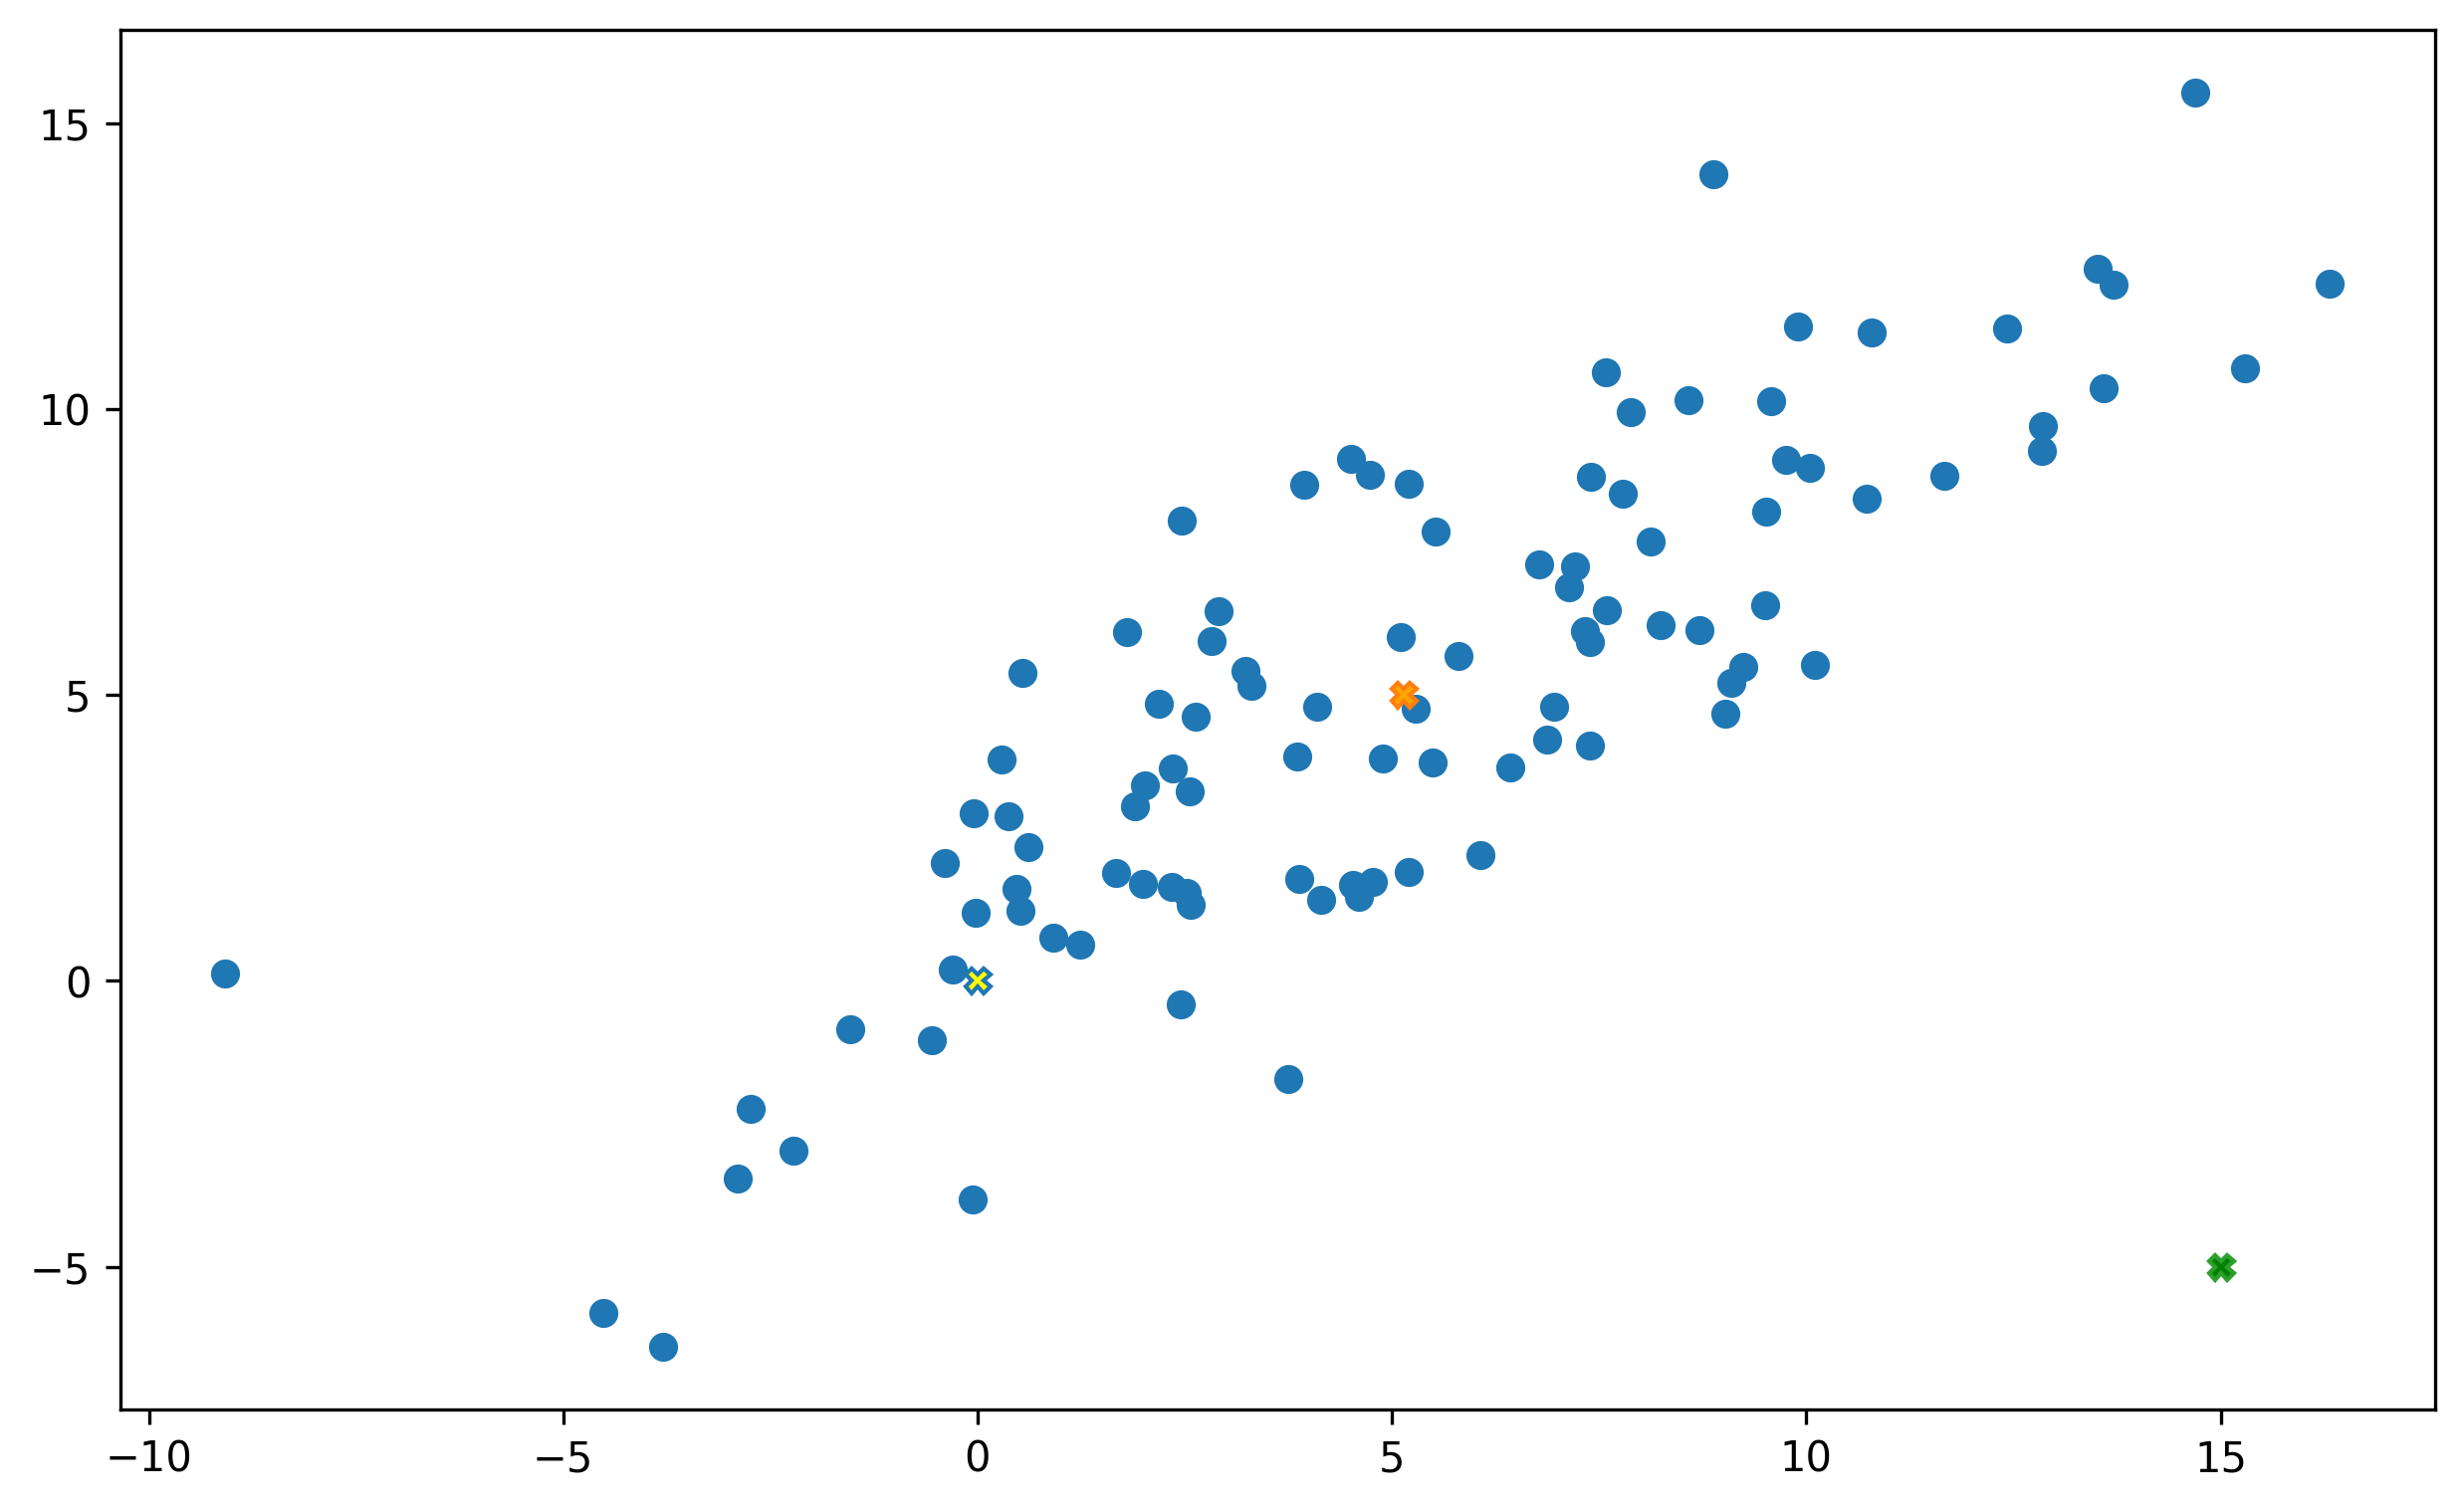

In [18]:
plt.scatter(m[:,0], m[:,1])
plt.plot(
    o[0], o[1],
    marker="X",
    markerfacecolor="yellow"
)
plt.plot(
    mean[0], mean[1],
    marker="X",
    markerfacecolor="orange"
)
plt.plot(
    15,-5,
    marker="X",
    markerfacecolor="green"
)

In [19]:
print(mahalanobis([[15,-5]],m))
print(euclidean([15,-5],mean))

[[56.1973289]]
14.039277855756067
